In [30]:
# Dependencies
import os
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create path to file
path_national = ('../Clean_2011_2016/medicare_national_costs2011_2016.csv')
path_state = ('../Clean_2011_2016/medicare_state_costs2011_2016.csv')
path_ethnicity = ('../Clean_2011_2016/medicare_ethnicity_breakdown2011_2016.csv')
path_expenditures = ('../Clean_2011_2016/total_national_expenditures2011-216.csv')
path_historical_summary = ('../Clean_2011_2016/healthcare_historical_data_summary2011_2016.csv')
path_historical_percents = ('../Clean_2011_2016/healthcare_percent_change_data_2011_2016.csv')
path_median_income = ('../Cleaned_Data/median_income.csv')
path_obesity = ('../Clean_2011_2016/overall_clean_obesity_data.csv')
path_obesity_us = ('../Clean_2011_2016/us_obesity_total.csv')

In [54]:
# Reformat national df
medicare_national = pd.read_csv(path_national,skipinitialspace=True)
medicare_national = medicare_national.set_index('Unnamed: 0')
del medicare_national.index.name
pd.options.display.float_format = '${:,.2f}'.format
medicare_national.T

,FFS Beneficiaries,Total Actual Costs
2011,"$33,243,630.00","$323,694,090,197.63"
2012,"$33,524,593.00","$325,627,793,988.71"
2013,"$33,641,801.00","$326,410,120,897.28"
2014,"$33,462,982.00","$327,653,738,646.21"
2015,"$33,551,417.00","$335,133,914,012.21"
2016,"$33,991,540.00","$343,377,861,003.88"


In [65]:
# Making years integers
nattys = mc_national_cost.reset_index(drop = False)
nattys['index'] = nattys['index'].astype(int)
natty = nattys.set_index('index')
del natty.index.name

,FFS Beneficiaries,Total Actual Costs
2011,"$33,243,630.00","$323,694,090,197.63"
2012,"$33,524,593.00","$325,627,793,988.71"
2013,"$33,641,801.00","$326,410,120,897.28"
2014,"$33,462,982.00","$327,653,738,646.21"
2015,"$33,551,417.00","$335,133,914,012.21"
2016,"$33,991,540.00","$343,377,861,003.88"


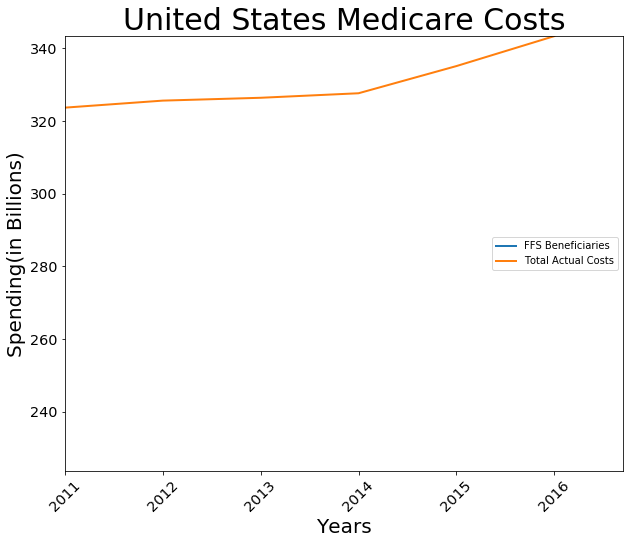

In [71]:
# Reformat
mc_national_cost = medicare_national.T
mc_national = natty.div(1000000000)

# Creating variables for my limits
nat_low = mc_national['Total Actual Costs'].min() -100
nat_high = mc_national['Total Actual Costs'].max()
nat_xlow = mc_national.index.min()
nat_xhigh = mc_national.index.max()+0.7
nat_x_axis = np.arange (nat_xlow, nat_xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (10, 8))
plt.plot(mc_national, linewidth = 2)
plt.legend(labels = mc_national, loc="right",  
           prop={'size': 10}, fancybox = True)
plt.title('United States Medicare Costs', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in Billions)', fontdict = {'fontsize' : 20})
plt.xticks(nat_x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (nat_xlow, nat_xhigh)
plt.ylim (nat_low, nat_high)
plt.show()

In [10]:
# Reformat states df
medicare_state = pd.read_csv(path_state,skipinitialspace=True)
medicare_states = medicare_state.drop(columns = {'Unnamed: 0'})
medicare_states = medicare_states.set_index('State')
del medicare_states.index.name
medicare_states.head()

,Beneficiaries 2011,Total Actual Costs 2011,Beneficiaries 2012,Total Actual Costs 2012,Beneficiaries 2013,Total Actual Costs 2013,Beneficiaries 2014,Total Actual Costs 2014,Beneficiaries 2015,Total Actual Costs 2015,Beneficiaries 2016,Total Actual Costs 2016
CA,2671637,2.866239e+10,2742188,2.942203e+10,2766683.0,2.992150e+10,2718792,2.942228e+10,2755868,3.074443e+10,2815420,3.242581e+10
TX,2321444,2.500245e+10,2310636,2.478010e+10,2230001.0,2.387679e+10,2235759,2.429354e+10,2190149,2.405938e+10,2223092,2.470190e+10
FL,2229556,2.472055e+10,2217181,2.449029e+10,2213241.0,2.429859e+10,2208280,2.428310e+10,2215360,2.451492e+10,2243115,2.477965e+10
NY,1841408,2.057967e+10,1837662,2.037430e+10,1825003.0,2.024889e+10,1801175,2.025600e+10,1788662,2.055105e+10,1803929,2.127581e+10
IL,1587999,1.625919e+10,1602266,1.629935e+10,1620399.0,1.636970e+10,1474203,1.490641e+10,1456942,1.488050e+10,1472941,1.533055e+10


In [23]:
medicare_state_costs = medicare_states.iloc[:, [1, 3, 5, 7, 9, 11]]
medicare_state_costs = medicare_state_costs.rename(columns = {'Total Actual Costs 2011' : 2011, 
                                'Total Actual Costs 2012': 2012, 'Total Actual Costs 2013': 2013,
                                'Total Actual Costs 2014': 2014, 'Total Actual Costs 2015': 2015,
                                'Total Actual Costs 2016': 2016})

# Reformating df
pd.options.display.float_format = '${:,.2f}'.format
medicare_state_costs.head()

,2011,2012,2013,2014,2015,2016
CA,"$28,662,389,980.08","$29,422,028,455.97","$29,921,500,970.50","$29,422,283,914.61","$30,744,427,238.10","$32,425,811,718.29"
TX,"$25,002,454,108.76","$24,780,099,131.64","$23,876,791,994.48","$24,293,540,727.72","$24,059,376,495.38","$24,701,901,753.48"
FL,"$24,720,553,969.45","$24,490,291,516.95","$24,298,591,933.81","$24,283,097,090.70","$24,514,917,389.99","$24,779,654,901.86"
NY,"$20,579,671,640.38","$20,374,299,062.07","$20,248,893,895.74","$20,255,995,176.58","$20,551,048,090.61","$21,275,813,539.78"
IL,"$16,259,185,273.50","$16,299,349,954.63","$16,369,700,739.41","$14,906,406,775.61","$14,880,495,079.06","$15,330,549,694.22"


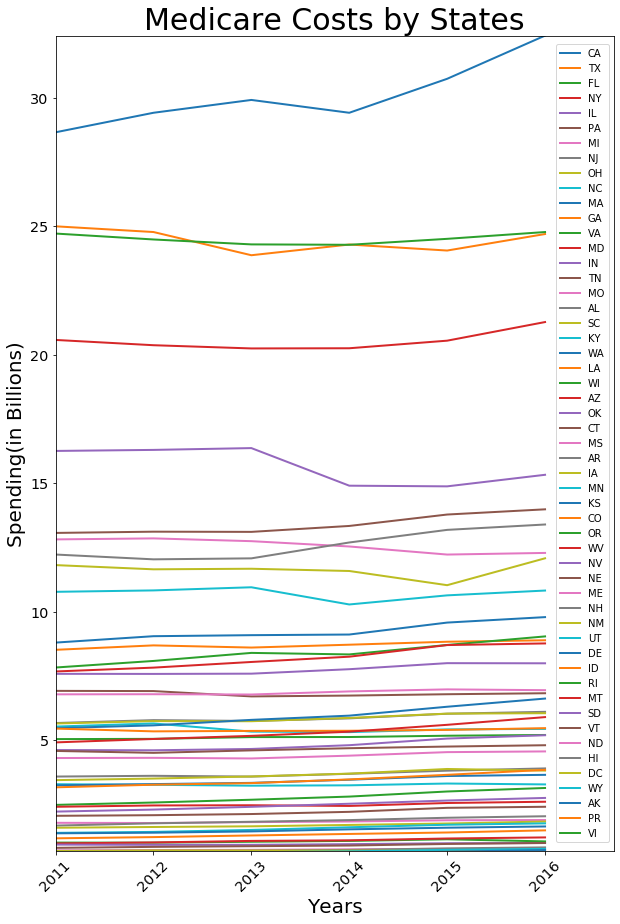

In [51]:
# Rotate df
mcs_state_cost = medicare_state_costs.T
mc_state_cost = mcs_state_cost.div(1000000000)

# Creating variables for my limits
mcs_low = mc_state_cost['DC'].min()
mcs_high = mc_state_cost['CA'].max()
mcs_xlow = mc_state_cost.index.min()
mcs_xhigh = mc_state_cost.index.max()+0.7
mcs_x_axis = np.arange (mcs_xlow, mcs_xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (10, 15))
plt.plot(mc_state_cost, linewidth = 2)
plt.legend(labels = mc_state_cost, loc="right",  
           prop={'size': 10}, fancybox = True)
plt.title('Medicare Costs by States', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in Billions)', fontdict = {'fontsize' : 20})
plt.xticks(mcs_x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (mcs_xlow, mcs_xhigh)
plt.ylim (mcs_low, mcs_high)
plt.show()

,CA,TX,FL,NY,IL,PA,MI,NJ,OH,NC,...,MT,SD,VT,ND,HI,DC,WY,AK,PR,VI
2011,"$28,662.39","$25,002.45","$24,720.55","$20,579.67","$16,259.19","$13,067.58","$12,815.68","$12,226.52","$11,815.26","$10,775.18",...,$980.60,$935.63,$809.03,$710.70,$691.00,$686.64,$586.12,$525.49,$428.97,$80.67
2012,"$29,422.03","$24,780.10","$24,490.29","$20,374.30","$16,299.35","$13,116.15","$12,855.14","$12,039.69","$11,651.27","$10,830.15",...,"$1,020.01",$926.54,$847.17,$724.72,$692.19,$709.09,$612.84,$539.76,$383.67,$82.45
2013,"$29,921.50","$23,876.79","$24,298.59","$20,248.89","$16,369.70","$13,108.65","$12,746.96","$12,078.09","$11,673.33","$10,952.28",...,"$1,079.49",$927.33,$873.82,$732.19,$699.38,$706.33,$638.11,$580.23,$374.83,$81.40
2014,"$29,422.28","$24,293.54","$24,283.10","$20,256.00","$14,906.41","$13,339.21","$12,540.28","$12,695.89","$11,586.05","$10,283.00",...,"$1,102.39",$953.52,$899.15,$751.34,$729.32,$700.76,$673.55,$616.98,$378.60,$85.09
2015,"$30,744.43","$24,059.38","$24,514.92","$20,551.05","$14,880.50","$13,783.61","$12,225.75","$13,186.49","$11,033.54","$10,637.34",...,"$1,173.43",$988.79,$960.91,$762.52,$789.17,$704.92,$731.07,$657.98,$355.48,$87.50
2016,"$32,425.81","$24,701.90","$24,779.65","$21,275.81","$15,330.55","$13,986.18","$12,289.31","$13,395.74","$12,080.11","$10,824.59",...,"$1,215.47",$997.64,$998.41,$770.46,$826.68,$710.38,$769.53,$724.80,$354.45,$93.86


In [4]:
obesity_df = pd.read_csv(path_obesity,skipinitialspace=True)
obesity_df

,State,Year,Percent Adults,Sample_Size,Obese_Count,GeoLocation
0,AL,2011,32.0,7304.0,2337.28,"(32.84057112200048, -86.63186076199969)"
1,OR,2011,26.7,5959.0,1591.05,"(44.56744942400047, -120.15503132599969)"
2,FL,2011,26.6,11770.0,3130.82,"(28.932040377000476, -81.92896053899966)"
3,OK,2011,31.1,8159.0,2537.45,"(35.47203135600046, -97.52107021399968)"
4,OH,2011,29.6,9339.0,2764.34,"(40.06021014100048, -82.40426005599966)"
...,...,...,...,...,...,...
315,HI,2016,23.8,7659.0,1822.84,"(21.304850435000446, -157.85774940299973)"
316,ID,2016,27.4,4880.0,1337.12,"(43.682630005000476, -114.3637300419997)"
317,IL,2016,31.6,4518.0,1427.69,"(40.48501028300046, -88.99771017799969)"
318,IA,2016,32.0,6645.0,2126.40,"(42.46940091300047, -93.81649055599968)"


In [5]:
obesity_total_df = pd.read_csv(path_obesity_us,skipinitialspace=True)
obesity_total = obesity_total_df.drop(columns ={'Unnamed: 0'})
obesity_total

,Year,Percent Adults,Sample_Size,Obese_Count
0,2011,27.4,470700.0,128971.80
1,2012,27.7,442230.0,122497.71
2,2013,28.3,457487.0,129468.82
3,2014,28.9,425875.0,123077.87
4,2015,28.9,398316.0,115113.32
5,2016,29.6,438479.0,129789.78


In [19]:
state_obesity = obesity_df[['State', 'Year', 'Obese_Count']]

# Obese Count broken into year by state (2011)
state_obesity_11 = state_obesity.loc[(state_obesity['Year']== 2011),:]
state_obesity_011 = state_obesity_11.drop(columns={'Year'})
state_obesity_2011 = state_obesity_011.rename(columns= {'Obese_Count':2011})

# Obese Count broken into year by state (2012)
state_obesity_12 = state_obesity.loc[(state_obesity['Year']== 2012),:]
state_obesity_012 = state_obesity_12.drop(columns={'Year'})
state_obesity_2012 = state_obesity_012.rename(columns= {'Obese_Count':2012})

# Obese Count broken into year by state (2013)
state_obesity_13 = state_obesity.loc[(state_obesity['Year']== 2013),:]
state_obesity_013 = state_obesity_13.drop(columns={'Year'})
state_obesity_2013 = state_obesity_013.rename(columns= {'Obese_Count':2013})

# Obese Count broken into year by state (2014)
state_obesity_14 = state_obesity.loc[(state_obesity['Year']== 2014),:]
state_obesity_014 = state_obesity_14.drop(columns={'Year'})
state_obesity_2014 = state_obesity_014.rename(columns= {'Obese_Count':2014})

# Obese Count broken into year by state (2015)
state_obesity_15 = state_obesity.loc[(state_obesity['Year']== 2015),:]
state_obesity_015 = state_obesity_12.drop(columns={'Year'})
state_obesity_2015 = state_obesity_012.rename(columns= {'Obese_Count':2015})

# Obese Count broken into year by state (2016)
state_obesity_16 = state_obesity.loc[(state_obesity['Year']== 2016),:]
state_obesity_016 = state_obesity_16.drop(columns={'Year'})
state_obesity_2016 = state_obesity_016.rename(columns= {'Obese_Count':2016})
state_obesity_2016.head()

,State,2016
265,OK,2115.27
266,OH,3608.32
267,ND,1706.01
268,NC,1902.91
269,NV,1027.10


In [24]:
state_obese_count = state_obesity_2011.merge(state_obesity_2012,on='State').merge(
        state_obesity_2013,on='State').merge(state_obesity_2014,on='State').merge(
        state_obesity_2015,on='State').merge(state_obesity_2016,on='State')

state_obese_count

,State,2011,2012,2013,2014,2015,2016
0,AL,2337.28,2854.83,2023.06,2743.65,2854.83,2329.78
1,OR,1591.05,1380.29,1502.02,1372.40,1380.29,1435.00
2,FL,3130.82,1835.06,8593.73,2398.87,1835.06,9092.96
3,OK,2537.45,2485.52,2559.38,2642.97,2485.52,2115.27
4,OH,2764.34,3708.02,3423.04,3362.04,3708.02,3608.32
5,ND,1385.00,1373.62,2298.03,2340.62,1373.62,1706.01
6,NC,3139.89,3289.45,2437.85,1966.44,3289.45,1902.91
7,HI,1614.73,1739.56,1658.76,1526.00,1739.56,1822.84
8,NY,1769.39,1345.20,2150.11,1707.75,1345.20,7973.60
9,ID,1549.53,1494.90,1573.24,1481.12,1494.90,1337.12


In [45]:
# Reformat national df
median_income_df = pd.read_csv(path_median_income,skipinitialspace=True)
median_income_data = median_income_df.set_index('Unnamed: 0')
del median_income_data.index.name

median_income_graph = median_income_data.iloc[27:33,:]
median_income_graph

,Median Income
2011,50054
2012,51017
2013,53585
2014,53657
2015,56516
2016,59039


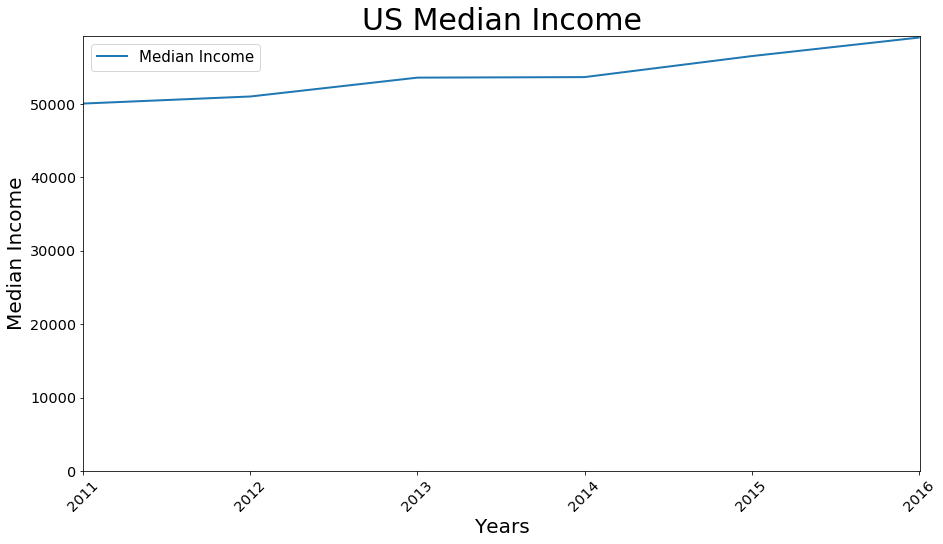

In [46]:
# Toying with graphs - need to limit info to see trends

# Creating variables for my limits
low = 0
high = median_income_graph['Median Income'].max() +200
xlow = median_income_graph.index.min()
xhigh = median_income_graph.index.max()+.01
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (15, 8))
plt.plot(median_income_graph, linewidth = 2)
plt.legend(labels = median_income_graph, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('US Median Income', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Median Income', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.savefig('../Images/Median_Income_2011')
plt.show()